In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

df=pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data',
         header=None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                  'OD280/OD315 of diluted wines', 'Proline']
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
df.head()

## PART 1 RF estimators

for i in [1,10,50,100,500,1000]:
    rf=RandomForestClassifier(criterion='gini', n_estimators=i,random_state=1,n_jobs=-1)
    rf.fit(X_train,y_train)
    scores=cross_val_score(rf,X_train,y_train,cv=10)
    print("n_estimators =",i,"; CV score(in sample)=","%.4f"%np.mean(scores),"; test score =", "%.4f"%rf.score(X_test,y_test))
  

n_estimators = 1 ; CV score(in sample)= 0.9333 ; test score = 0.9167
n_estimators = 10 ; CV score(in sample)= 0.9600 ; test score = 1.0000
n_estimators = 50 ; CV score(in sample)= 0.9733 ; test score = 1.0000
n_estimators = 100 ; CV score(in sample)= 0.9800 ; test score = 1.0000
n_estimators = 500 ; CV score(in sample)= 0.9800 ; test score = 1.0000
n_estimators = 1000 ; CV score(in sample)= 0.9800 ; test score = 1.0000


 1) Color intensity                0.192401
 2) Proline                        0.186857
 3) Flavanoids                     0.155700
 4) OD280/OD315 of diluted wines   0.110542
 5) Alcohol                        0.103741
 6) Total phenols                  0.058002
 7) Hue                            0.053172
 8) Alcalinity of ash              0.035665
 9) Magnesium                      0.029377
10) Malic acid                     0.028798
11) Nonflavanoid phenols           0.020893
12) Ash                            0.016274
13) Proanthocyanins                0.008579


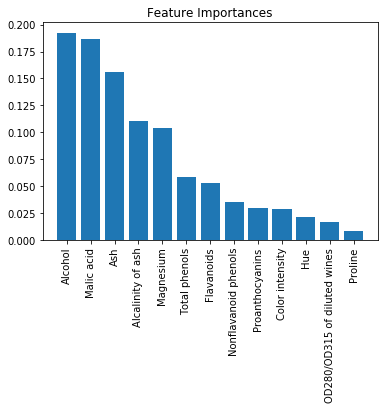

In [38]:
## PART 2 feature importance

feat_labels=df.columns[1:]
rf=RandomForestClassifier(n_estimators=100,random_state=1)
forest.fit(X_train,y_train)

importances=forest.feature_importances_

indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.savefig('feature importances.png')
plt.show()
   

In [39]:
print("My name is Xiaoman Gong")
print("My NetID is: xiaoman5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xiaoman Gong
My NetID is: xiaoman5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
